# Gradient Descent Optimization

## Introduction

Gradient descent is a first-order iterative optimization algorithm used to find the minimum of a differentiable function. It is the cornerstone of modern machine learning and deep learning, serving as the primary method for training neural networks and optimizing loss functions.

## Mathematical Foundation

### The Optimization Problem

Given a differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, we seek to find:

$$\mathbf{x}^* = \arg\min_{\mathbf{x} \in \mathbb{R}^n} f(\mathbf{x})$$

### The Gradient

The gradient of $f$ at point $\mathbf{x}$ is the vector of partial derivatives:

$$\nabla f(\mathbf{x}) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)^T$$

The gradient points in the direction of steepest ascent. Therefore, to minimize $f$, we move in the opposite direction.

### The Update Rule

The fundamental gradient descent update rule is:

$$\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k)$$

where:
- $\mathbf{x}_k$ is the current position at iteration $k$
- $\alpha > 0$ is the **learning rate** (step size)
- $\nabla f(\mathbf{x}_k)$ is the gradient evaluated at $\mathbf{x}_k$

### Convergence Conditions

For a convex function $f$ with Lipschitz continuous gradients (i.e., $\|\nabla f(\mathbf{x}) - \nabla f(\mathbf{y})\| \leq L\|\mathbf{x} - \mathbf{y}\|$), gradient descent converges when:

$$0 < \alpha < \frac{2}{L}$$

The optimal learning rate is $\alpha^* = \frac{1}{L}$, yielding convergence rate:

$$f(\mathbf{x}_k) - f(\mathbf{x}^*) \leq \frac{L\|\mathbf{x}_0 - \mathbf{x}^*\|^2}{2k}$$

## Test Functions

We will demonstrate gradient descent on two classic optimization test functions:

### 1. Rosenbrock Function (Banana Function)

$$f(x, y) = (a - x)^2 + b(y - x^2)^2$$

With $a = 1$ and $b = 100$, the global minimum is at $(1, 1)$ where $f(1, 1) = 0$.

The gradient is:
$$\nabla f = \begin{pmatrix} -2(a - x) - 4bx(y - x^2) \\ 2b(y - x^2) \end{pmatrix}$$

### 2. Beale's Function

$$f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$$

The global minimum is at $(3, 0.5)$ where $f(3, 0.5) = 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## Implementation

### Define Test Functions and Their Gradients

In [2]:
# Rosenbrock function and gradient
def rosenbrock(x, y, a=1, b=100):
    """Rosenbrock function: f(x,y) = (a-x)^2 + b(y-x^2)^2"""
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_gradient(x, y, a=1, b=100):
    """Gradient of Rosenbrock function"""
    dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dy = 2 * b * (y - x**2)
    return np.array([dx, dy])

# Beale's function and gradient
def beale(x, y):
    """Beale's function"""
    term1 = (1.5 - x + x*y)**2
    term2 = (2.25 - x + x*y**2)**2
    term3 = (2.625 - x + x*y**3)**2
    return term1 + term2 + term3

def beale_gradient(x, y):
    """Gradient of Beale's function"""
    term1 = 1.5 - x + x*y
    term2 = 2.25 - x + x*y**2
    term3 = 2.625 - x + x*y**3
    
    dx = 2*term1*(y-1) + 2*term2*(y**2-1) + 2*term3*(y**3-1)
    dy = 2*term1*x + 2*term2*2*x*y + 2*term3*3*x*y**2
    return np.array([dx, dy])

# Simple quadratic for demonstration
def quadratic(x, y):
    """Simple quadratic: f(x,y) = x^2 + 2y^2"""
    return x**2 + 2*y**2

def quadratic_gradient(x, y):
    """Gradient of quadratic function"""
    return np.array([2*x, 4*y])

### Gradient Descent Algorithm

In [3]:
def gradient_descent(func, grad_func, x0, learning_rate=0.01, 
                     max_iterations=1000, tolerance=1e-8):
    """
    Perform gradient descent optimization.
    
    Parameters:
    -----------
    func : callable
        Objective function f(x, y)
    grad_func : callable
        Gradient function returning [df/dx, df/dy]
    x0 : array-like
        Initial point [x, y]
    learning_rate : float
        Step size α
    max_iterations : int
        Maximum number of iterations
    tolerance : float
        Convergence tolerance for gradient norm
    
    Returns:
    --------
    history : dict
        Dictionary containing optimization trajectory
    """
    x = np.array(x0, dtype=float)
    history = {
        'x': [x.copy()],
        'f': [func(x[0], x[1])],
        'grad_norm': []
    }
    
    for i in range(max_iterations):
        grad = grad_func(x[0], x[1])
        grad_norm = np.linalg.norm(grad)
        history['grad_norm'].append(grad_norm)
        
        # Check convergence
        if grad_norm < tolerance:
            print(f"Converged at iteration {i}")
            break
        
        # Gradient descent update
        x = x - learning_rate * grad
        
        history['x'].append(x.copy())
        history['f'].append(func(x[0], x[1]))
    
    history['x'] = np.array(history['x'])
    history['f'] = np.array(history['f'])
    history['grad_norm'] = np.array(history['grad_norm'])
    history['iterations'] = len(history['f']) - 1
    
    return history

## Visualization and Analysis

### Effect of Learning Rate on Convergence

Converged at iteration 23


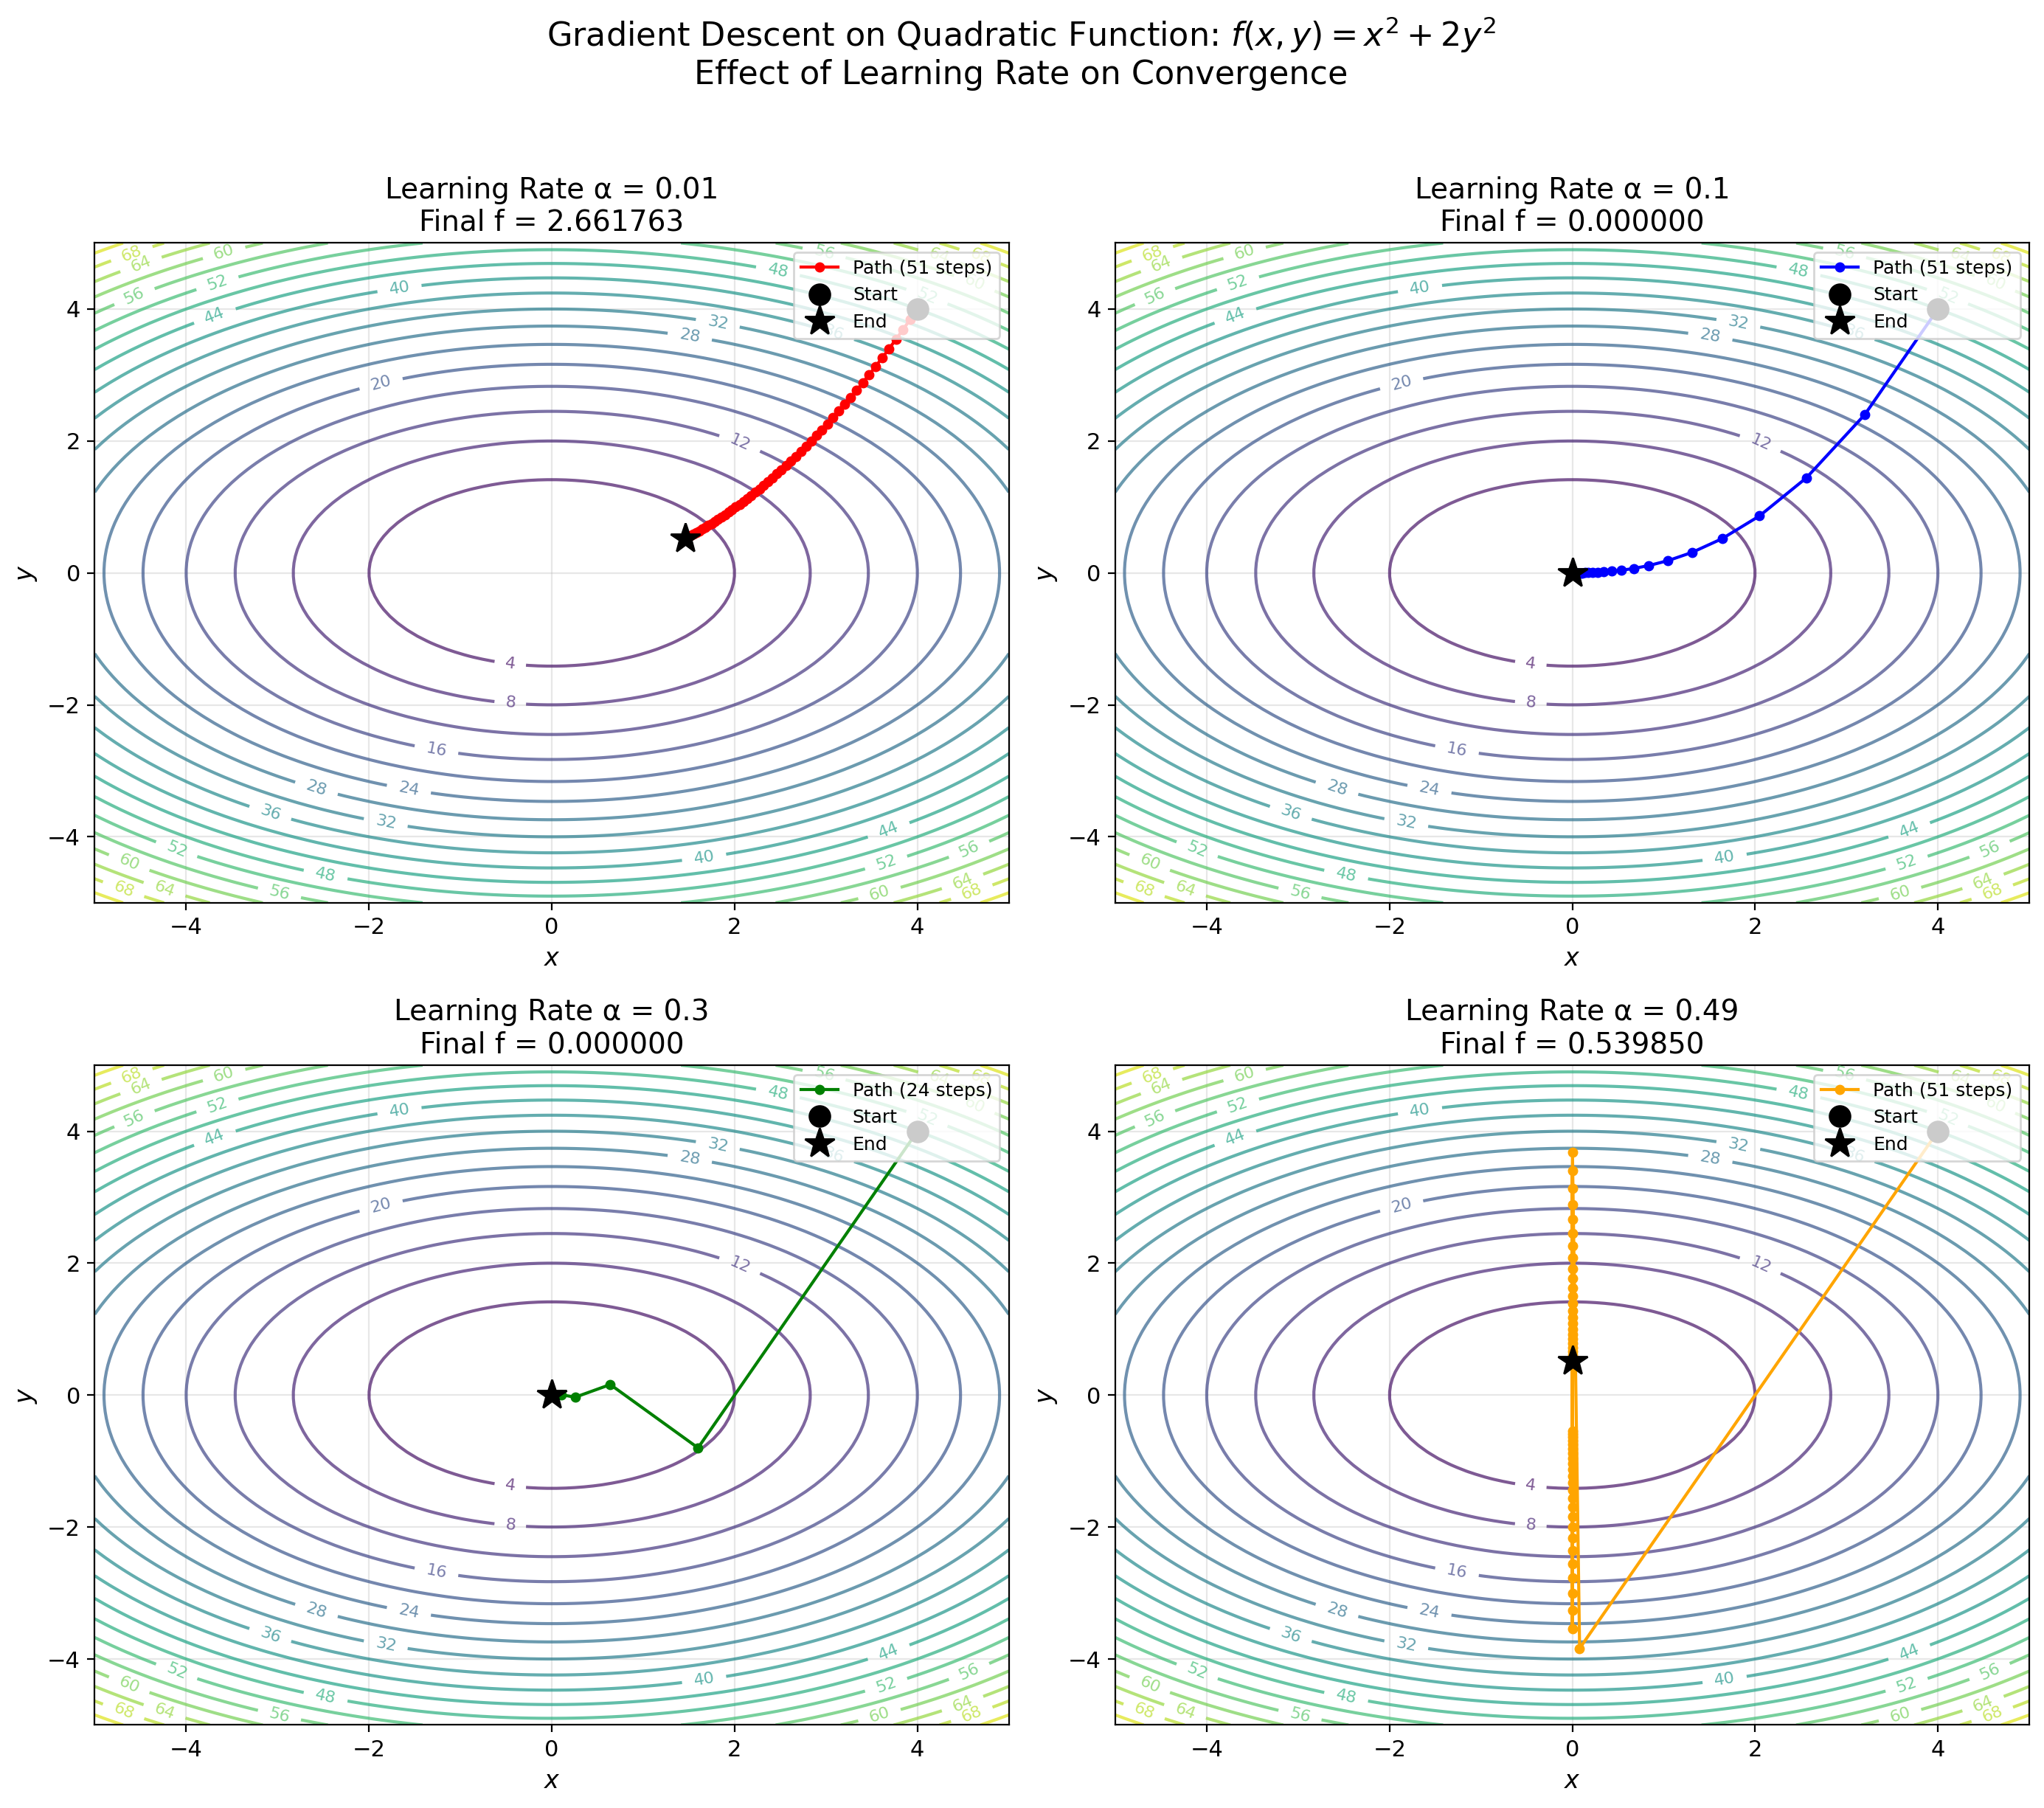


Summary of Learning Rate Effects:
α = 0.01: 100 iterations, final f = 2.91e-01
Converged at iteration 92
α = 0.10:  92 iterations, final f = 2.36e-17
Converged at iteration 23
α = 0.30:  23 iterations, final f = 7.92e-18
α = 0.49: 100 iterations, final f = 9.11e-03


In [4]:
# Demonstrate effect of learning rate on simple quadratic
x0 = [4.0, 4.0]
learning_rates = [0.01, 0.1, 0.3, 0.49]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Create contour plot background
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = quadratic(X, Y)

colors = ['red', 'blue', 'green', 'orange']

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Run gradient descent
    history = gradient_descent(quadratic, quadratic_gradient, x0, 
                               learning_rate=lr, max_iterations=50)
    
    # Plot contours
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Plot trajectory
    trajectory = history['x']
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'o-', color=color, 
            markersize=4, linewidth=1.5, label=f'Path ({len(trajectory)} steps)')
    ax.plot(trajectory[0, 0], trajectory[0, 1], 'ko', markersize=10, label='Start')
    ax.plot(trajectory[-1, 0], trajectory[-1, 1], 'k*', markersize=15, label='End')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'Learning Rate α = {lr}\nFinal f = {history["f"][-1]:.6f}')
    ax.legend(loc='upper right', fontsize=9)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True, alpha=0.3)

plt.suptitle('Gradient Descent on Quadratic Function: $f(x,y) = x^2 + 2y^2$\n' +
             'Effect of Learning Rate on Convergence', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('gradient_descent_optimization_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSummary of Learning Rate Effects:")
print("="*50)
for lr in learning_rates:
    history = gradient_descent(quadratic, quadratic_gradient, x0, 
                               learning_rate=lr, max_iterations=100)
    print(f"α = {lr:0.2f}: {history['iterations']:3d} iterations, " +
          f"final f = {history['f'][-1]:.2e}")

### Optimization on Rosenbrock Function

The Rosenbrock function is notoriously difficult to optimize due to its narrow, curved valley.

In [5]:
# Optimize Rosenbrock function
x0_rosenbrock = [-1.5, 2.0]

# Run with a small learning rate (larger rates diverge)
history_rosenbrock = gradient_descent(
    rosenbrock, rosenbrock_gradient, x0_rosenbrock,
    learning_rate=0.001, max_iterations=10000, tolerance=1e-8
)

print(f"Rosenbrock Optimization Results:")
print(f"Starting point: {x0_rosenbrock}")
print(f"Final point: [{history_rosenbrock['x'][-1, 0]:.6f}, {history_rosenbrock['x'][-1, 1]:.6f}]")
print(f"Final f value: {history_rosenbrock['f'][-1]:.2e}")
print(f"Iterations: {history_rosenbrock['iterations']}")
print(f"True minimum: [1.0, 1.0] with f = 0")

Rosenbrock Optimization Results:
Starting point: [-1.5, 2.0]
Final point: [0.990202, 0.980461]
Final f value: 9.62e-05
Iterations: 10000
True minimum: [1.0, 1.0] with f = 0


### Convergence Analysis

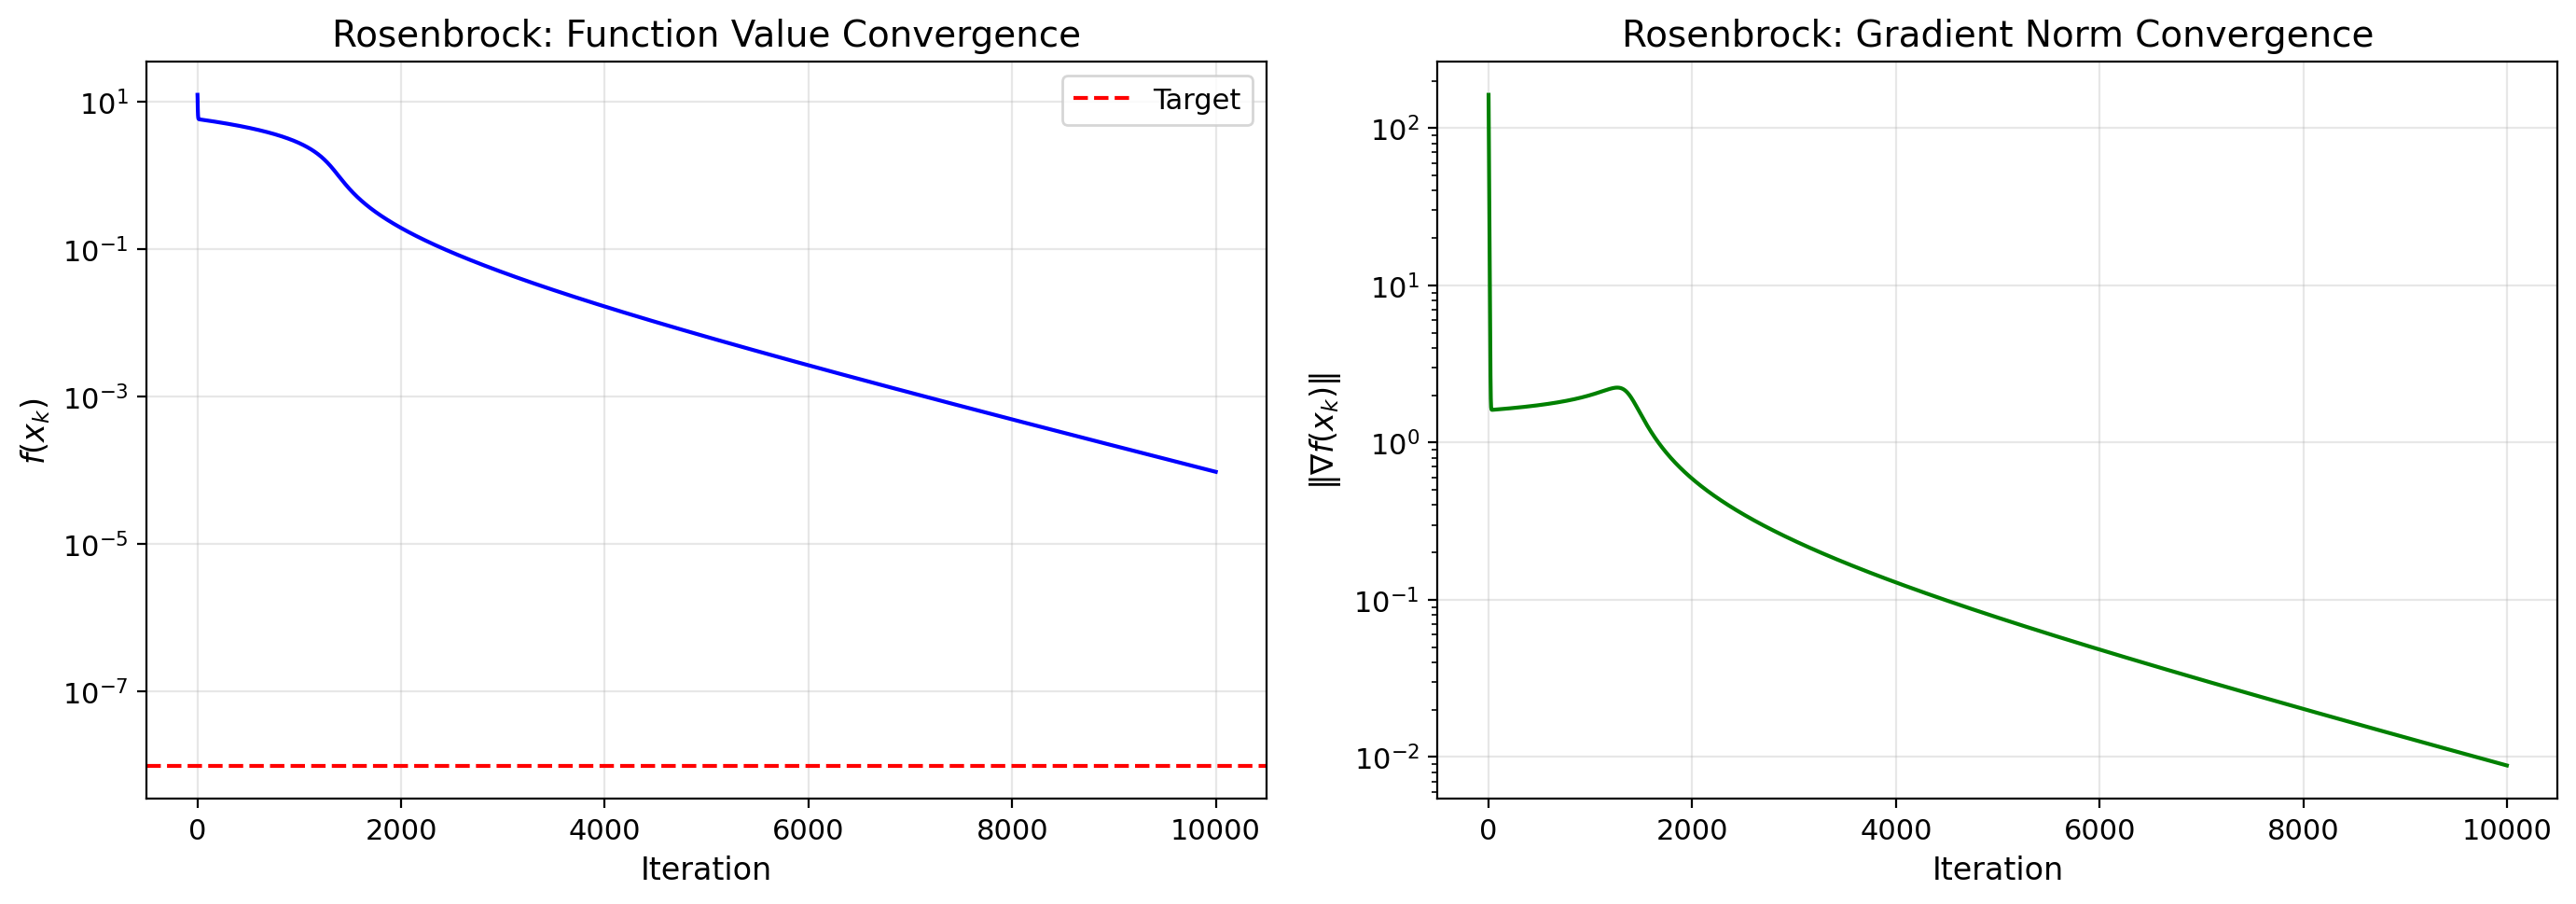

In [6]:
# Plot convergence curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Function value convergence
ax1 = axes[0]
ax1.semilogy(history_rosenbrock['f'], 'b-', linewidth=1.5)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$f(x_k)$')
ax1.set_title('Rosenbrock: Function Value Convergence')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=1e-8, color='r', linestyle='--', label='Target')
ax1.legend()

# Right: Gradient norm convergence
ax2 = axes[1]
ax2.semilogy(history_rosenbrock['grad_norm'], 'g-', linewidth=1.5)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\|\\nabla f(x_k)\\|$')
ax2.set_title('Rosenbrock: Gradient Norm Convergence')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Advanced Topics

### Momentum-Based Gradient Descent

Standard gradient descent can be slow in narrow valleys. Momentum accelerates convergence by accumulating a velocity vector:

$$\mathbf{v}_{k+1} = \beta \mathbf{v}_k + \nabla f(\mathbf{x}_k)$$
$$\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \mathbf{v}_{k+1}$$

where $\beta \in [0, 1)$ is the momentum coefficient.

In [7]:
def gradient_descent_momentum(func, grad_func, x0, learning_rate=0.01,
                               momentum=0.9, max_iterations=1000, tolerance=1e-8):
    """
    Gradient descent with momentum.
    """
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)  # velocity
    
    history = {
        'x': [x.copy()],
        'f': [func(x[0], x[1])],
        'grad_norm': []
    }
    
    for i in range(max_iterations):
        grad = grad_func(x[0], x[1])
        grad_norm = np.linalg.norm(grad)
        history['grad_norm'].append(grad_norm)
        
        if grad_norm < tolerance:
            break
        
        # Momentum update
        v = momentum * v + grad
        x = x - learning_rate * v
        
        history['x'].append(x.copy())
        history['f'].append(func(x[0], x[1]))
    
    history['x'] = np.array(history['x'])
    history['f'] = np.array(history['f'])
    history['grad_norm'] = np.array(history['grad_norm'])
    history['iterations'] = len(history['f']) - 1
    
    return history

# Compare standard GD vs momentum on Rosenbrock
history_standard = gradient_descent(
    rosenbrock, rosenbrock_gradient, x0_rosenbrock,
    learning_rate=0.001, max_iterations=5000
)

history_momentum = gradient_descent_momentum(
    rosenbrock, rosenbrock_gradient, x0_rosenbrock,
    learning_rate=0.001, momentum=0.9, max_iterations=5000
)

print("Comparison: Standard GD vs Momentum")
print("="*50)
print(f"Standard GD - Final f: {history_standard['f'][-1]:.2e}, Iterations: {history_standard['iterations']}")
print(f"Momentum GD - Final f: {history_momentum['f'][-1]:.2e}, Iterations: {history_momentum['iterations']}")

Comparison: Standard GD vs Momentum
Standard GD - Final f: 6.51e-03, Iterations: 5000
Momentum GD - Final f: 1.25e-16, Iterations: 4225


### Visualization: Standard vs Momentum

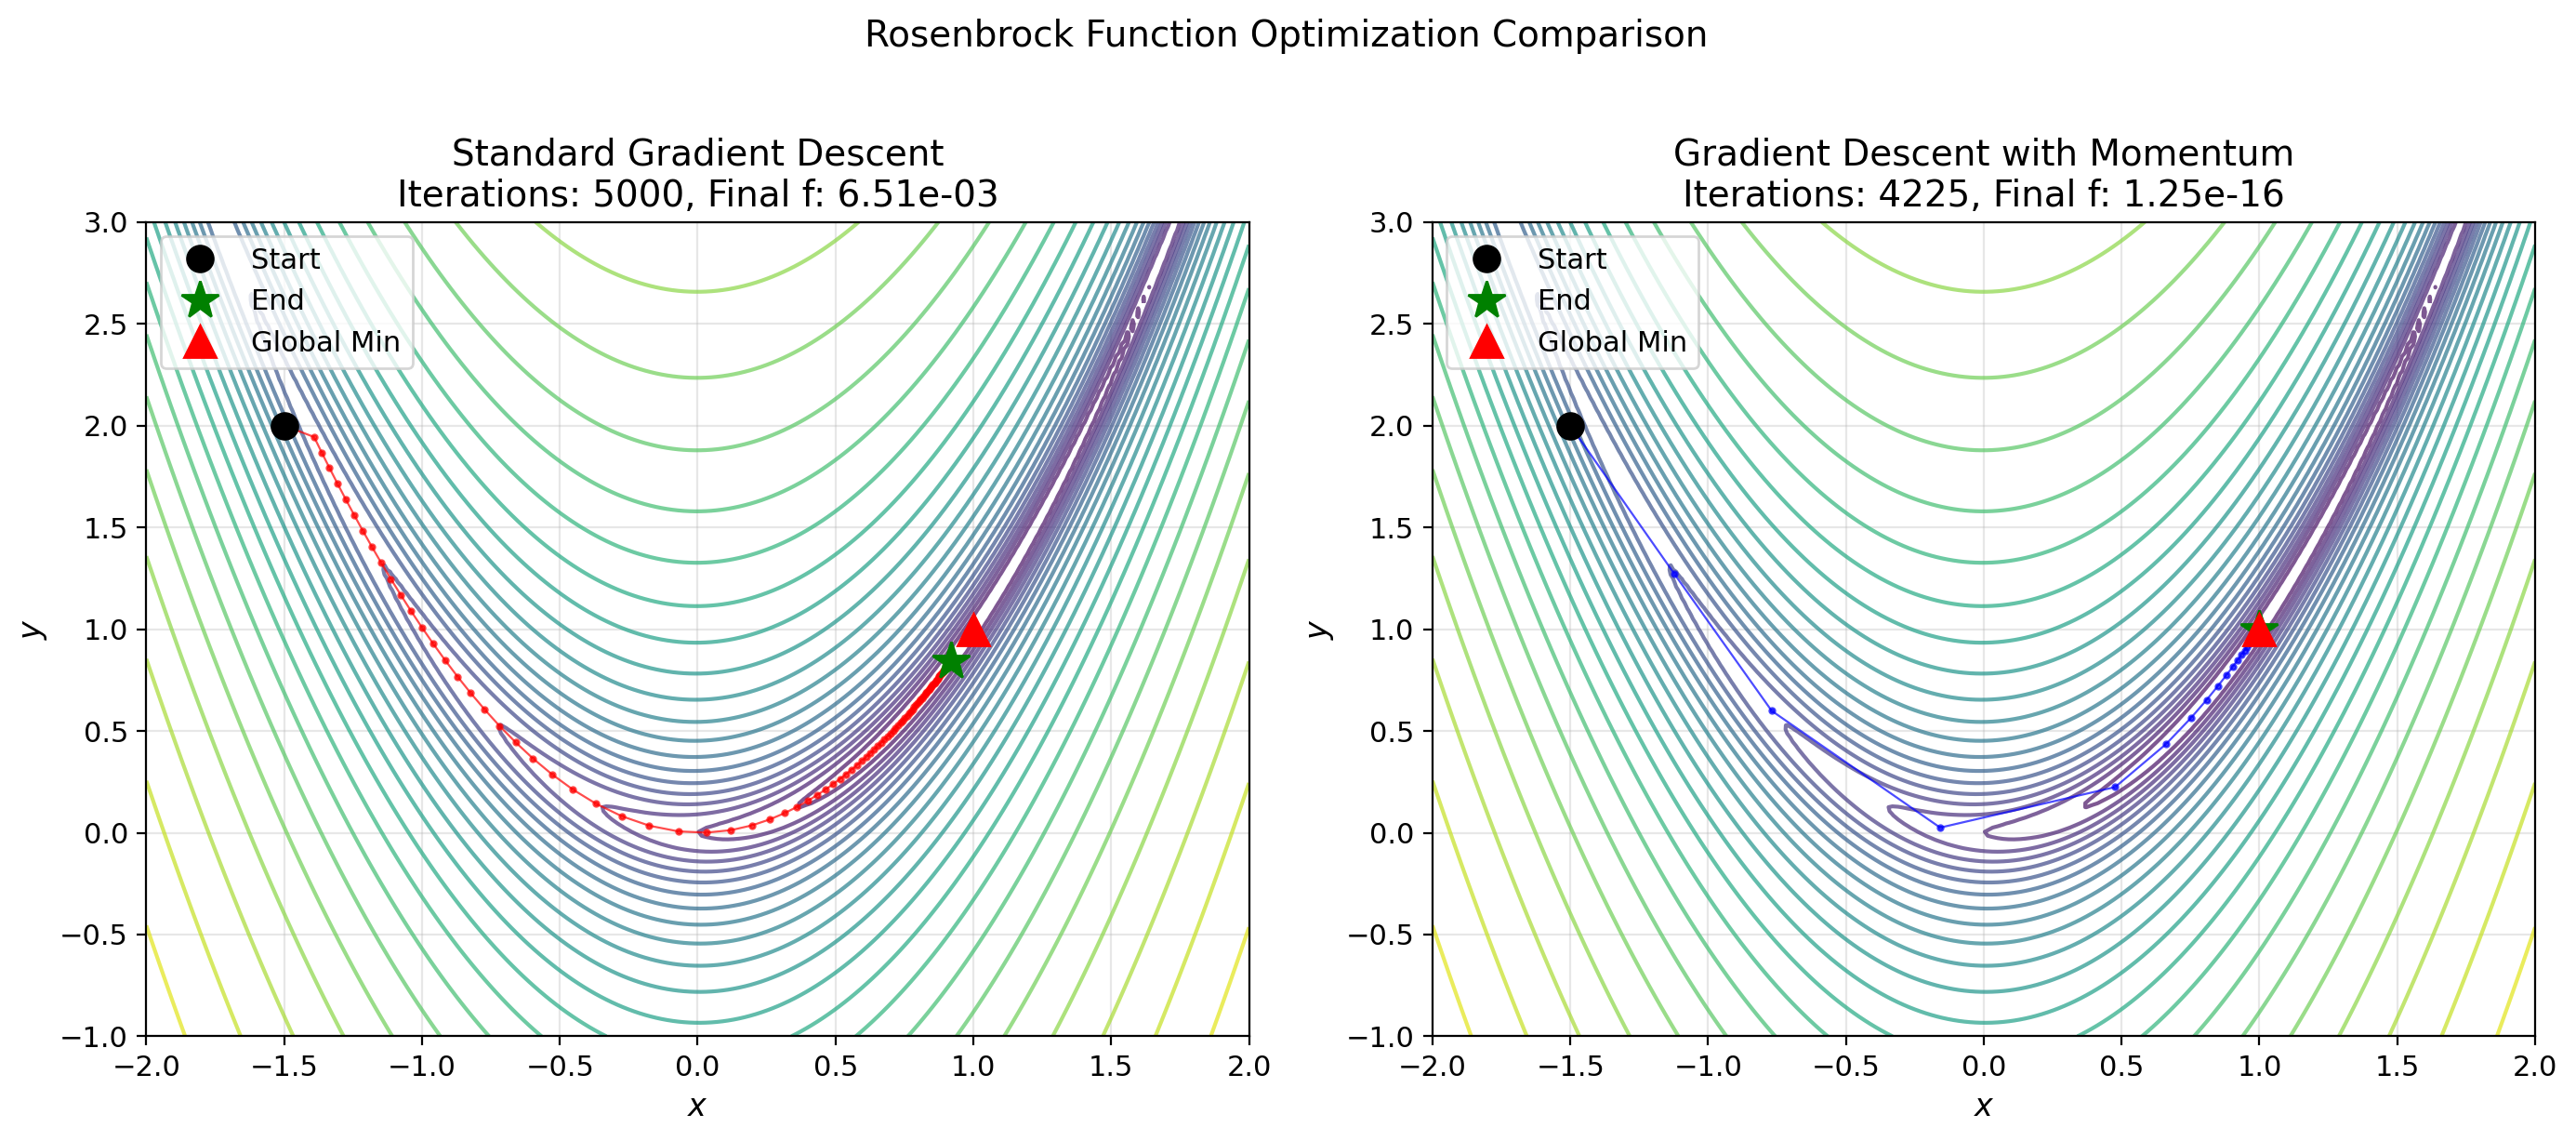

In [8]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create contour for Rosenbrock
x_range = np.linspace(-2, 2, 200)
y_range = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

# Plot trajectories
for ax, history, title, color in [
    (axes[0], history_standard, 'Standard Gradient Descent', 'red'),
    (axes[1], history_momentum, 'Gradient Descent with Momentum', 'blue')
]:
    # Contour plot
    contour = ax.contour(X, Y, np.log10(Z + 1), levels=30, cmap='viridis', alpha=0.7)
    
    # Trajectory (subsample for clarity)
    traj = history['x']
    step = max(1, len(traj) // 100)
    ax.plot(traj[::step, 0], traj[::step, 1], 'o-', color=color, 
            markersize=2, linewidth=0.8, alpha=0.7)
    
    # Start and end points
    ax.plot(traj[0, 0], traj[0, 1], 'ko', markersize=10, label='Start')
    ax.plot(traj[-1, 0], traj[-1, 1], 'g*', markersize=15, label='End')
    ax.plot(1, 1, 'r^', markersize=12, label='Global Min')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(f'{title}\nIterations: {history["iterations"]}, Final f: {history["f"][-1]:.2e}')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)

plt.suptitle('Rosenbrock Function Optimization Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated the fundamentals of gradient descent optimization:

1. **Learning Rate Selection**: The learning rate $\alpha$ critically affects convergence:
   - Too small: slow convergence
   - Too large: oscillation or divergence
   - Optimal: balance between speed and stability

2. **Convergence Properties**: For convex functions with Lipschitz gradients, gradient descent achieves $O(1/k)$ convergence rate.

3. **Momentum**: Adding momentum can significantly accelerate convergence, especially in narrow valleys like the Rosenbrock function.

### Key Equations Summary

| Method | Update Rule |
|--------|-------------|
| Standard GD | $\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k)$ |
| Momentum | $\mathbf{v}_{k+1} = \beta \mathbf{v}_k + \nabla f(\mathbf{x}_k)$, $\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \mathbf{v}_{k+1}$ |

### Further Reading

- Nesterov, Y. (2004). *Introductory Lectures on Convex Optimization*
- Boyd, S. & Vandenberghe, L. (2004). *Convex Optimization*
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*, Chapter 8